Searches: PySwarmsGlobal
========================

This example illustrates how to use the particle swarm optimization  algorithm PySwarmsGlobal.

Information about PySwarms can be found at the following links:

 - https://github.com/ljvmiranda921/pyswarms
 - https://pyswarms.readthedocs.io/en/latest/index.html
 - https://pyswarms.readthedocs.io/en/latest/api/pyswarms.single.html#module-pyswarms.single.global_best

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autofit as af
import model as m
import analysis as a

import matplotlib.pyplot as plt
import numpy as np
from os import path

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


__Data__

This example fits a single 1D Gaussian, we therefore load and plot data containing one Gaussian.

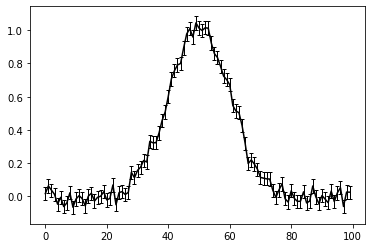

In [2]:
dataset_path = path.join("dataset", "example_1d", "gaussian_x1")
data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
noise_map = af.util.numpy_array_from_json(
    file_path=path.join(dataset_path, "noise_map.json")
)

plt.errorbar(
    x=range(data.shape[0]),
    y=data,
    yerr=noise_map,
    color="k",
    ecolor="k",
    elinewidth=1,
    capsize=2,
)
plt.show()
plt.close()

__Model + Analysis__

We create the model and analysis, which in this example is a single `Gaussian` and therefore has dimensionality N=3.

In [3]:
model = af.Model(m.Gaussian)

model.centre = af.UniformPrior(lower_limit=0.0, upper_limit=100.0)
model.intensity = af.LogUniformPrior(lower_limit=1e-2, upper_limit=1e2)
model.sigma = af.UniformPrior(lower_limit=0.0, upper_limit=30.0)

analysis = a.Analysis(data=data, noise_map=noise_map)

__Search__

We now create and run the `PySwarmsGlobal` object which acts as our non-linear search. 

We manually specify all of the PySwarms settings, descriptions of which are provided at the following webpage:

 https://pyswarms.readthedocs.io/en/latest/api/pyswarms.single.html#module-pyswarms.single.global_best

In [4]:
pso = af.PySwarmsGlobal(
    path_prefix="searches",
    name="PySwarmsGlobal",
    n_particles=50,
    iters=100,
    cognitive=0.5,
    social=0.3,
    inertia=0.9,
    ftol=-np.inf,
    iterations_per_update=500,
    number_of_cores=2,
)

result = pso.fit(model=model, analysis=analysis)

INFO:root:PySwarmsGlobal already completed, skipping non-linear search.


__Result__

The result object returned by the fit provides information on the results of the non-linear search. Lets use it to
compare the maximum log likelihood `Gaussian` to the data.

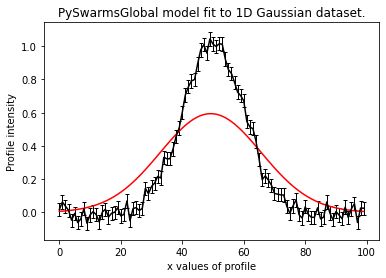

In [5]:
model_data = result.max_log_likelihood_instance.profile_from_xvalues(
    xvalues=np.arange(data.shape[0])
)

plt.errorbar(
    x=range(data.shape[0]),
    y=data,
    yerr=noise_map,
    color="k",
    ecolor="k",
    elinewidth=1,
    capsize=2,
)
plt.plot(range(data.shape[0]), model_data, color="r")
plt.title("PySwarmsGlobal model fit to 1D Gaussian dataset.")
plt.xlabel("x values of profile")
plt.ylabel("Profile intensity")
plt.show()
plt.close()
